In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
#Gets data from dataset and sorts it by genres by alphabetic
df = pd.read_csv('cleaned_dataset.csv')
df.sort_values(by=['track_genre'])

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
50865,505,505,43,188.735,0,0.595,0.180,9,-11.391,1,0.0298,0.89000,0.000000,0.1130,0.2610,79.922,3,acoustic
31549,647,647,28,202.594,0,0.306,0.948,0,-2.877,1,0.0989,0.64000,0.000000,0.3530,0.9030,135.760,4,acoustic
60888,776,776,50,245.160,0,0.277,0.291,11,-9.851,0,0.0306,0.90100,0.000025,0.1030,0.1750,75.119,3,acoustic
26698,928,928,25,187.908,0,0.491,0.561,11,-7.225,1,0.0246,0.10800,0.000000,0.1390,0.2200,151.943,4,acoustic
67079,227,227,55,240.952,0,0.647,0.567,1,-8.971,1,0.0328,0.03180,0.000000,0.1330,0.3740,125.871,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,113539,113539,26,159.781,0,0.509,0.206,0,-17.289,1,0.0803,0.99200,0.900000,0.1870,0.3420,75.057,4,world-music
28301,113526,113526,26,116.000,0,0.437,0.216,0,-21.602,1,0.0522,0.95700,0.936000,0.0983,0.0299,120.266,3,world-music
43800,113133,113133,38,299.186,0,0.425,0.843,4,-5.890,1,0.0307,0.00907,0.000003,0.9130,0.3870,159.975,4,world-music
28389,113524,113524,26,305.573,0,0.404,0.655,9,-8.001,1,0.0340,0.00310,0.000000,0.1650,0.2000,136.946,4,world-music


In [ ]:
genre_counts = df['track_genre'].value_counts()
#Filters to top 10 genres and creates a dataet with only those rows
filtered_genre_count = genre_counts[genre_counts >= 958]
print(filtered_genre_count)
df = df[df["track_genre"].str.contains("study|black-metal|comedy|heavy-metal|bluegrass|forro|malay|grindcore|iranian|idm") == True]
df

track_genre
study          996
black-metal    991
comedy         987
heavy-metal    985
bluegrass      978
forro          967
grindcore      965
malay          965
iranian        958
idm            958
Name: count, dtype: int64


,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6,59519,59519,0,186.250,0,0.123,0.907,0,-8.194,1,0.0869,0.192000,0.93600,0.2340,0.0752,86.817,4,iranian
9,59636,59636,0,615.053,1,0.427,0.516,7,-4.327,1,0.0397,0.008330,0.36100,0.1290,0.0360,120.114,3,iranian
28,59480,59480,0,134.666,0,0.332,0.701,7,-6.735,0,0.0936,0.464000,0.20300,0.1820,0.4910,156.279,3,iranian
29,59737,59737,0,93.000,0,0.444,0.920,7,-4.079,1,0.0495,0.144000,0.93600,0.3410,0.9650,110.295,1,iranian
30,59930,59930,0,223.411,0,0.439,0.953,6,-5.512,1,0.0627,0.000076,0.02690,0.1660,0.0688,127.405,3,iranian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76838,7300,7300,67,232.133,0,0.621,0.403,9,-8.211,1,0.0359,0.581000,0.00000,0.1140,0.6340,145.523,4,bluegrass
77371,7151,7151,69,193.533,0,0.582,0.371,2,-9.585,0,0.0280,0.912000,0.00784,0.1080,0.1630,128.756,4,bluegrass
77644,18003,18003,69,197.760,1,0.802,0.341,7,-8.560,1,0.4880,0.169000,0.00000,0.0783,0.8490,166.010,4,comedy
79162,18015,18015,74,328.666,1,0.927,0.367,9,-7.797,1,0.3820,0.325000,0.00000,0.1320,0.5760,99.053,4,comedy


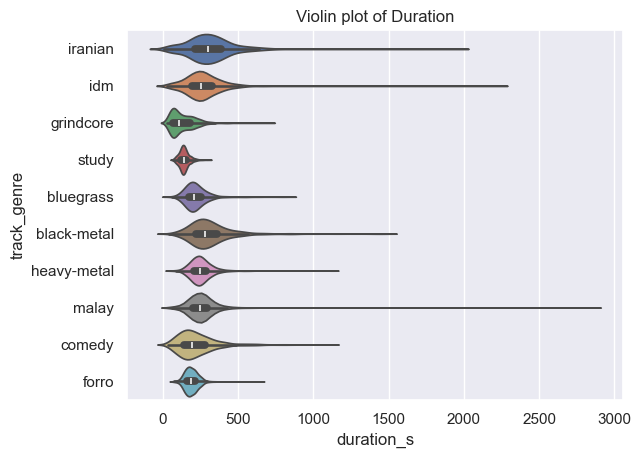

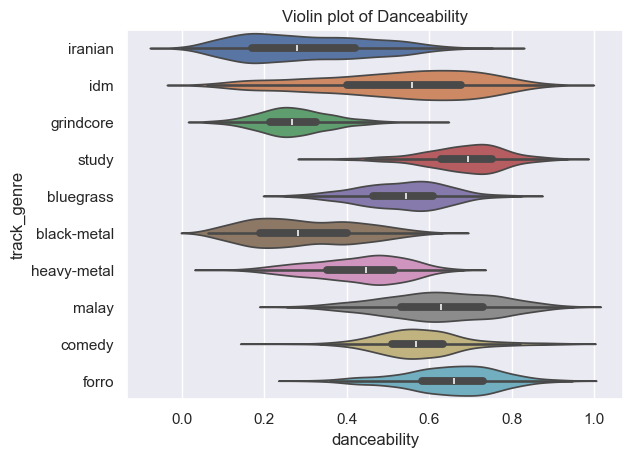

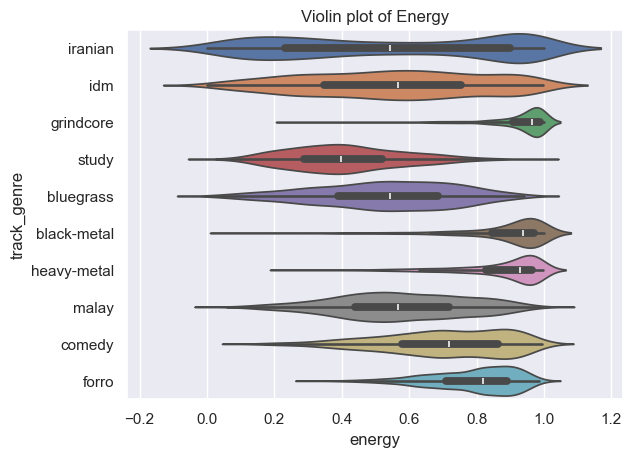

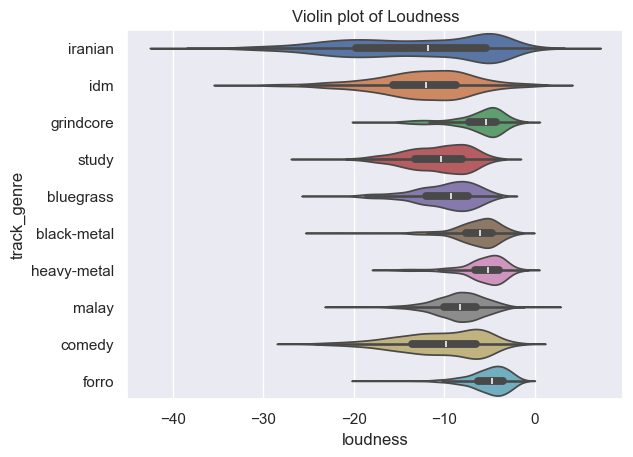

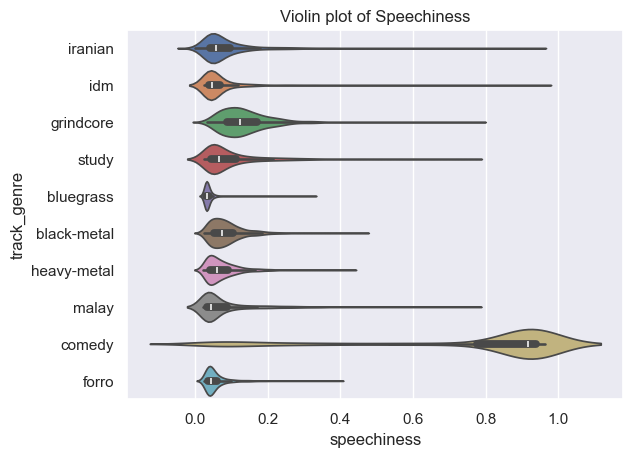

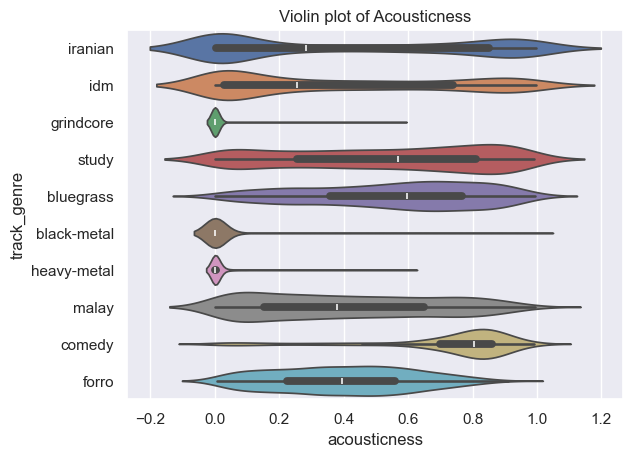

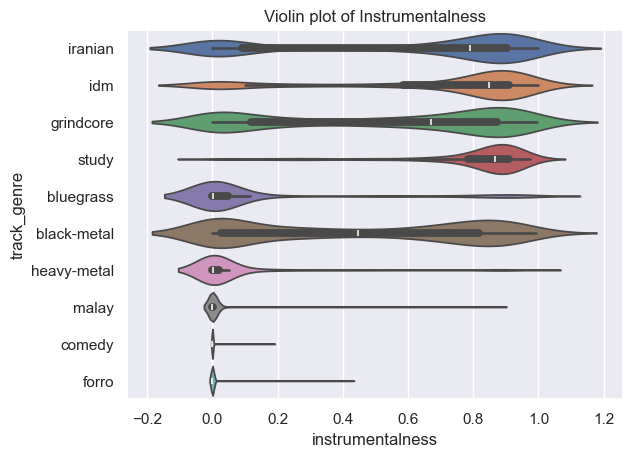

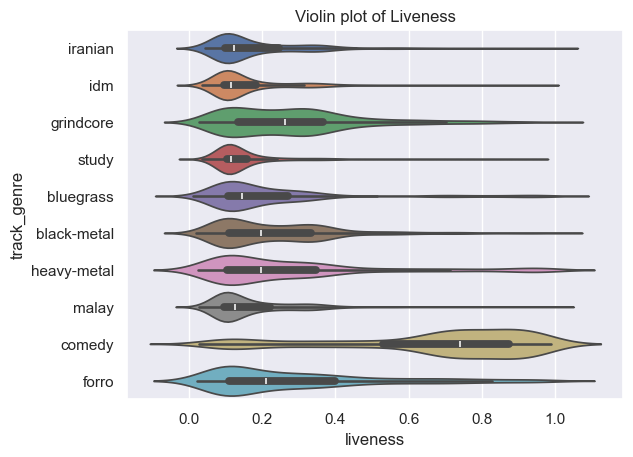

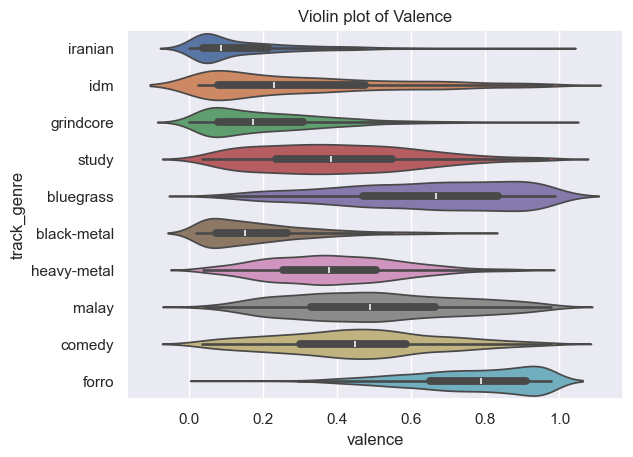

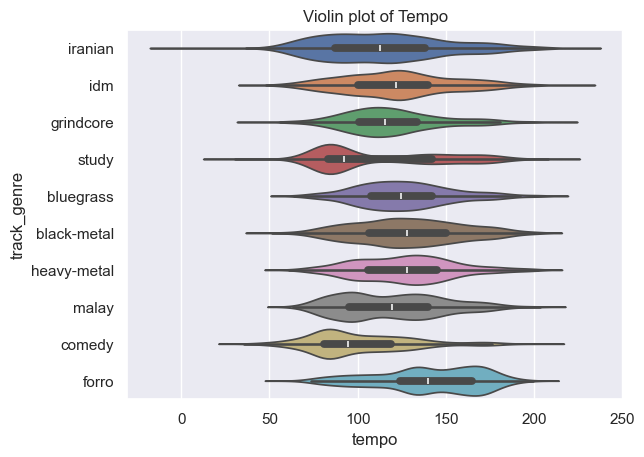

KeyboardInterrupt: 

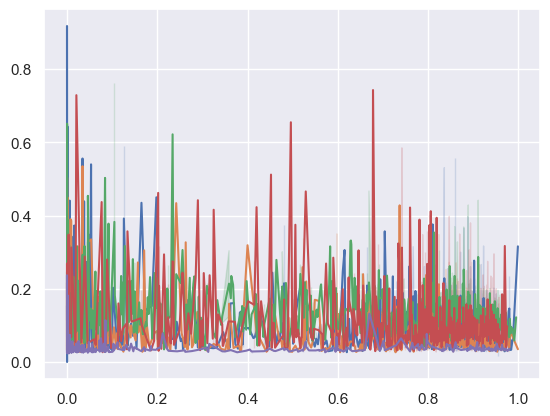

In [ ]:
sns.set_theme()
#Violin Plot for Duration
sns.violinplot(hue = 'track_genre', x = 'duration_s', y = 'track_genre', data = df)
plt.title('Violin plot of Duration')
plt.show()
#Violin Plot for Danceability
sns.violinplot(hue = 'track_genre',x = 'danceability', y = 'track_genre', data = df)
plt.title('Violin plot of Danceability')
plt.show()
#Violin Plot for Energy
sns.violinplot(hue = 'track_genre',x = 'energy', y = 'track_genre', data = df)
plt.title('Violin plot of Energy')
plt.show()
#Violin Plot for Loudness
sns.violinplot(hue = 'track_genre',x = 'loudness', y = 'track_genre', data = df)
plt.title('Violin plot of Loudness')
plt.show()
#Violin Plot for Speechiness
sns.violinplot(hue = 'track_genre',x = 'speechiness', y = 'track_genre', data = df)
plt.title('Violin plot of Speechiness')
plt.show()
#Violin Plot for Acousticness
sns.violinplot(hue = 'track_genre',x = 'acousticness', y = 'track_genre', data = df)
plt.title('Violin plot of Acousticness')
plt.show()
#Violin Plot for Instrumentalness
sns.violinplot(hue = 'track_genre',x = 'instrumentalness', y = 'track_genre', data = df)
plt.title('Violin plot of Instrumentalness')
plt.show()
#Violin Plot for Liveness
sns.violinplot(hue = 'track_genre',x = 'liveness', y = 'track_genre', data = df)
plt.title('Violin plot of Liveness')
plt.show()
#Violin Plot for Valence
sns.violinplot(hue = 'track_genre',x = 'valence', y = 'track_genre', data = df)
plt.title('Violin plot of Valence')
plt.show()
#Violin Plot for Tempo
sns.violinplot(hue = 'track_genre',x = 'tempo', y = 'track_genre', data = df)
plt.title('Violin plot of Tempo')
plt.show()
